In [97]:
"""
HW 1
"""

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt


# Consider the ODE

In [ ]:


def true_y(t):

    return (np.pi * np.e**(3*(np.cos(t) - 1)) )/ np.sqrt(2)

def dydt (y_n, t_n):
    
    return -3*y_n*np.sin(t_n)

y_0 = np.pi/np.sqrt(2)

In [99]:
# ONE DELTA
def FE(y_0, delta_t, f):
    t = np.arange(0, 5 + delta_t, delta_t)
    
    y_n = y_0
    results = []
    for t_n in t:
        y_new = y_n + delta_t * f(y_n, t_n)

        results.append(y_new)
        y_n = y_new
    results = np.array(results)
    
    return t, results
    #return np.array([t.T,results.T])

In [100]:
time_steps, results = FE(y_0, 2**(-2), dydt)
print(time_steps, results)

real_y =  true_y(time_steps)
print(real.shape)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.  ] [2.22144147e+00 1.80924641e+00 1.15869721e+00 5.66337512e-01
 2.08920074e-01 6.02236213e-02 1.51690511e-02 3.97445126e-03
 1.26398253e-03 5.26379335e-04 2.90111808e-04 2.07068538e-04
 1.85152402e-04 2.00176844e-04 2.52840854e-04 3.61226393e-04
 5.66259169e-04 9.46356117e-04 1.64017482e-03 2.86943598e-03
 4.93311483e-03]
(21,)


<function matplotlib.pyplot.show(close=None, block=None)>

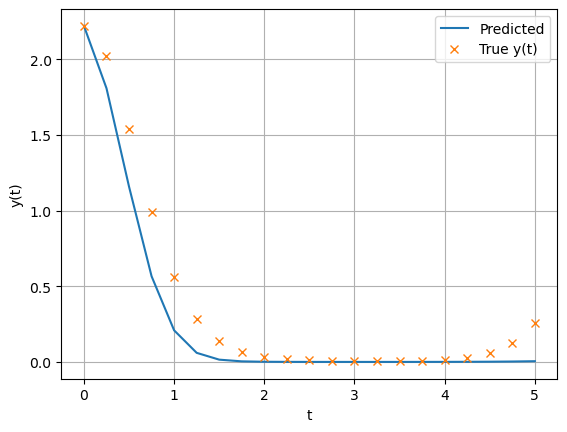

In [101]:
plt.plot(time_steps, results, '-', label='Predicted')
plt.plot(time_steps, real_y, 'x', label='True y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show

In [102]:
# For each of these delta_t values calculate the error E = mean(abs(y_true - y_num))

all_deltas = [2**(-2), 2**(-3), 2**(-4), 2**(-5), 2**(-6), 2**(-7), 2**(-8)]
all_error_mean = []
for delta in all_deltas:
    t, y_num = FE(y_0, delta, dydt) 
    #print(delta ,y_num.shape)
    y_true = true_y(t)
    E = np.mean(abs(y_true - y_num))
    all_error_mean.append(E)

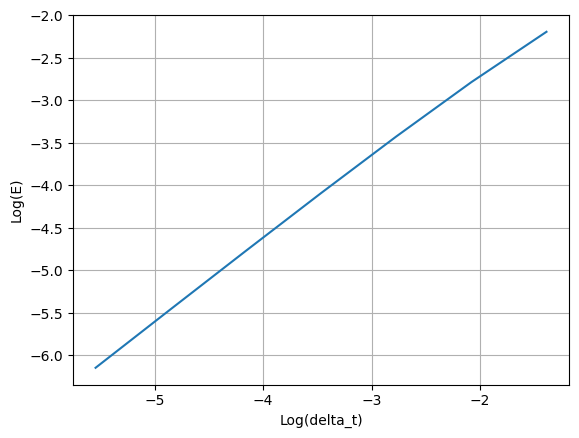

0.9553697527587569


In [103]:
# Plot log(delta_t) on the x axis and Log(E) on the y axis.

plt.plot(np.log(all_deltas), np.log(all_error_mean))
plt.xlabel('Log(delta_t)')
plt.ylabel('Log(E)')
plt.grid(True)
plt.show()
# Using Polyfit find the slope of the best fit line through this data. This is the order of the forward Euler method.

slope, intercept = np.polyfit(np.log(all_deltas), np.log(all_error_mean), 1)

print(slope)

In [104]:
# Save your last numerical solution delta_t = 2**-8 as a column vector A1.
# Save th error values in a row vector with 7 components in A2
A1_t, A1 = FE(y_0, delta, dydt)

A1 = A1.reshape(-1,1)
print(A1.shape)

A2 = np.array(all_error_mean).reshape(1, -1)
print(A2.shape)

A3 = slope
print(A3)

(1281, 1)
(1, 7)
0.9553697527587569


Solve the ODE numerically using Heun's method:

In [105]:
def heun(y_0, delta_t, f):
    t = np.arange(0, 5 + delta_t, delta_t)
    
    y_n = y_0
    results = []
    for t_n in t:
        y_new = y_n + (delta_t/2) * (f(y_n, t_n) + f(y_n, t_n + delta_t) + delta_t*f(y_n, t_n))

        results.append(y_new)
        y_n = y_new
    results = np.array(results)
    
    return t, results

In [106]:
all_deltas = [2**(-2), 2**(-3), 2**(-4), 2**(-5), 2**(-6), 2**(-7), 2**(-8)]
all_error_mean_heun = []
for delta in all_deltas:
    t, y_num = heun(y_0, delta, dydt) 
    #print(delta ,y_num.shape)
    y_true = true_y(t)
    E = np.mean(abs(y_true - y_num))
    all_error_mean_heun.append(E)

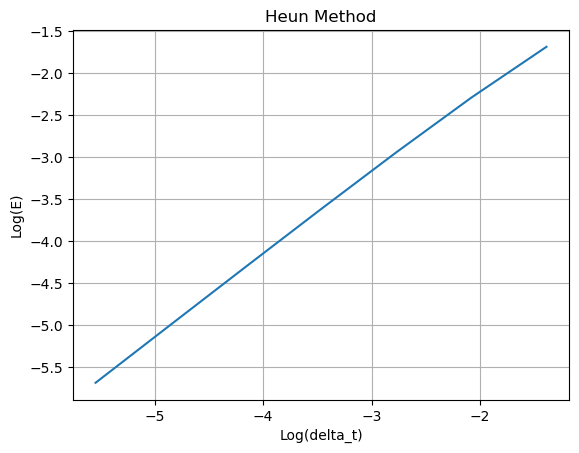

0.9654313925032365


In [107]:
plt.plot(np.log(all_deltas), np.log(all_error_mean_heun))
plt.title('Heun Method')
plt.xlabel('Log(delta_t)')
plt.ylabel('Log(E)')
plt.grid(True)
plt.show()
# Using Polyfit find the slope of the best fit line through this data. This is the order of the forward Euler method.

slope_heun, intercept_heun = np.polyfit(np.log(all_deltas), np.log(all_error_mean_heun), 1)

print(slope_heun)

In [108]:
A4_t, A4 = heun(y_0, delta, dydt)

A4 = A4.reshape(-1,1)
print(A4.shape)

A5 = np.array(all_error_mean_heun).reshape(1, -1)
print(A5.shape)

A6 = slope_heun
print(A6)

(1281, 1)
(1, 7)
0.9654313925032365


<function matplotlib.pyplot.show(close=None, block=None)>

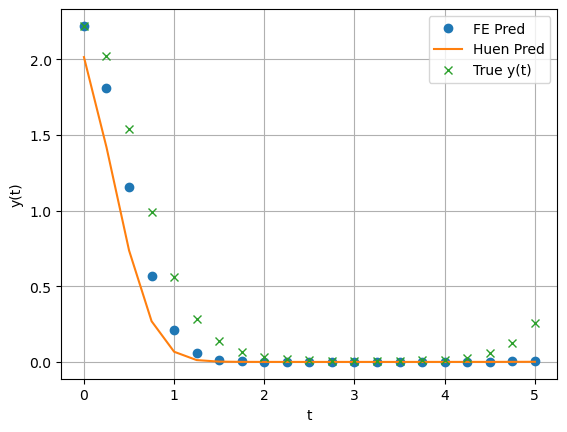

In [96]:
# Plot at 2**-2 timesteps in comparison to real, interested that FE closer.
plt.plot(time_steps, FE(y_0, 2**-2, dydt)[1], 'o', label='FE Pred')
plt.plot(time_steps, heun(y_0, 2**-2, dydt)[1], '-', label='Huen Pred')
plt.plot(time_steps, real_y, 'x', label='True y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show

In [109]:
print(A2)
print(A5)

[[0.11159213 0.06169789 0.03253887 0.01672603 0.00848239 0.00427178
  0.00214363]]
[[0.18458866 0.10086704 0.0525975  0.02680236 0.01352026 0.00678893
  0.00340153]]


# Consider the van der Pol Oscillator

In [ ]:
# Equations 
epsilon = 0.1

z_1 = y
z_2 = y_prime
z_1_prime = z_2

def z_2_prime(t):
    return -z_1(t)-epsilon*((z_1**2) - 1)*z_2(t)

In [130]:
def van_der_pol(t, w, epsilon):
    
    w1 = w[0]
    w2 = w[1]
    dw1dt = w2 # so on initial condition this would just return y'(0) = 1 ??

    dw2dt = -w1 -epsilon*((w1**2)-1)*w2
    
    #print(dw1dt, dw2dt)
    return [dw1dt, dw2dt] # initial condition y(0) = sqrt(3), y'(0) = 1


In [ ]:
# USING FitzHugh Implementation as reference

t_eval = np.arange(0, 32.5, 0.5)
w0 = [np.sqrt(3.0), 1.0]
epsilon = 0.1
#print(t_span[-1])
vdp_solutions = []
for epsilon in [0.1, 1.0, 20.0]:
    sol = solve_ivp(
        van_der_pol,
        args=(epsilon,),
        t_span=(float(t_eval[0]), float(t_eval[-1])),
        y0=w0,
        #method='LSODA',
        t_eval = t_eval,
    )
    vdp_solutions.append(sol.y[0]) # sol.y[0] should be y(t)
A7 = np.column_stack(vdp_solutions)

#print(A7.shape)

(65, 3)


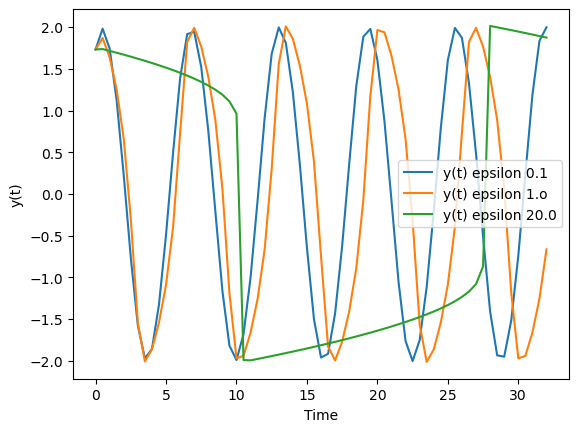

In [137]:
plt.plot(t_eval, vdp_solutions[0], label='y(t) epsilon 0.1')
plt.plot(t_eval, vdp_solutions[1], label='y(t) epsilon 1.o')
plt.plot(t_eval, vdp_solutions[2], label='y(t) epsilon 20.0')
#plt.plot(sol.t, sol.y[1], label='w(t)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.show()